In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
file_path = "/content/processed_dataset.csv"
df = pd.read_csv(file_path)

In [4]:
# Drop non-numeric columns if present (modify as per dataset)
df_numeric = df.select_dtypes(include=[np.number])

In [5]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [6]:
# Apply PCA
n_components = min(df_numeric.shape[0], df_numeric.shape[1])  # Choose optimal components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)


In [7]:
# Create a DataFrame for principal components
pc_df = pd.DataFrame(data=principal_components,
                     columns=[f'PC{i+1}' for i in range(n_components)])

In [8]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_


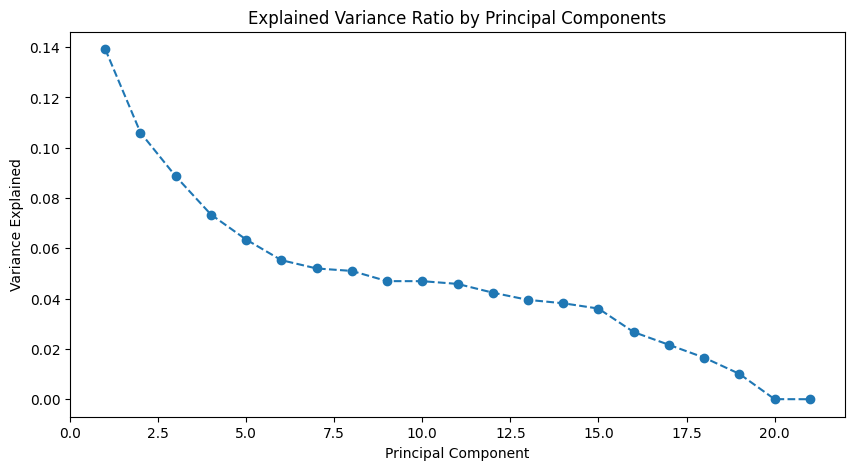

In [9]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [11]:
# Save the transformed data
pc_df.to_csv("/content/pca_transformed_dataset.csv", index=False)

In [12]:
# Print cumulative variance explained
print(f"Cumulative variance explained: {np.cumsum(explained_variance)}")

Cumulative variance explained: [0.13918785 0.24519267 0.33384577 0.40730169 0.47079189 0.52608612
 0.57808641 0.62910509 0.67606655 0.72301375 0.76887297 0.81124987
 0.85076353 0.8889233  0.92497879 0.95168929 0.97333474 0.9898791
 0.99997386 1.         1.        ]


In [13]:
# Display first few rows of transformed dataset
print(pc_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.241284 -0.362003 -0.988665  0.199016  0.027754 -1.323643  0.721317   
1 -1.298363  0.406304  0.533220 -0.929732  0.228841  2.167315 -0.440432   
2  0.747554  0.830615 -1.837775 -0.971529  1.438307  0.489112  0.080766   
3 -1.829526 -1.125936 -0.963102  0.927349 -0.157569 -0.386440  0.420833   
4  0.527954  1.749087 -0.726163 -1.199425 -0.083861 -0.684820  1.046004   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0  0.069731 -1.187675  0.201826  ... -0.217645 -0.734843 -0.576882 -0.141299   
1 -1.016263  1.491989 -0.246116  ...  0.484858  1.476147 -0.221086 -0.352449   
2 -0.763719  0.790837 -0.043698  ...  0.218650 -0.779344 -0.632092 -0.153652   
3 -0.049123 -0.048535 -0.282149  ...  0.175350  0.042138  0.416413 -0.363175   
4  0.780111 -0.761725  0.126620  ... -0.059370  1.314400 -0.644622 -0.209121   

       PC16      PC17      PC18      PC19      PC20          PC21  
